# Goal
### Create suitable categorical variables, choose most significant variables, choose two prediction models and and pick the best one

In [1]:
import seaborn as sns

In [2]:
import pandas as pd; pd.set_option('display.max_columns', 1000); pd.set_option('display.max_rows', 1000) ; pd.set_option('display.width', 1000)
import numpy as np
#import the cleaned and preprocessed data ready for prediction analysis
san_fran_df = pd.read_csv('data_for_prediction.csv')

In [3]:
import mapclassify
from geopy.distance import geodesic

In [4]:
import folium
from folium import plugins
from folium.plugins import HeatMap
import geopandas as gpd
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import seaborn as sns
sns.set()
sns.set_style("white")

/Users/davidbrablc/anaconda3/lib/python3.10/site-packages/geopandas/_compat.py:123: UserWarning: The Shapely GEOS version (3.10.3-CAPI-1.16.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(


# Choosing the most relevant features for the predictive model

In [5]:
san_fran_df = san_fran_df.drop('geometry', axis=1)

# POI features

In [6]:
#importing POI data
north_cali_loc = pd.read_csv('NorthernCalifornia_POIs', low_memory=False)
north_cali_loc = north_cali_loc.drop('geometry', axis=1)
pois_df = gpd.GeoDataFrame(north_cali_loc, geometry=gpd.points_from_xy(north_cali_loc['lon'], north_cali_loc['lat']))

In [7]:
pois_df.head()

,Unnamed: 0,version,timestamp,changeset,id,tags,lat,lon,addr:city,addr:country,addr:full,addr:housenumber,addr:housename,addr:postcode,addr:place,addr:street,email,name,opening_hours,operator,phone,ref,url,website,amenity,atm,bank,bicycle_parking,bicycle_rental,bar,building,building:levels,cafe,car_wash,drinking_water,fast_food,fountain,fuel,gambling,ice_cream,internet_access,kindergarten,landuse,library,office,parking,police,school,social_facility,source,start_date,theatre,university,wikipedia,agrarian,alcohol,bakery,bicycle,books,car,clothes,coffee,collector,computer,cosmetics,craft,dry_cleaning,fireplace,furniture,gas,hairdresser,kiosk,kitchen,lottery,massage,medical_supply,model,motorcycle,music,musical_instrument,organic,outdoor,pet,religion,second_hand,shoes,shop,ski,supermarket,trade,video,water,wholesale,wine,attraction,camp_site,guest_house,information,museum,tourism,viewpoint,zoo,osm_type,bbq,restaurant,social_centre,caravan,deli,golf,laundry,swimming_pool,trailer,tyres,geometry
0,0,3,1567817615,0.0,15972546,"{""brand"":""Chase"",""brand:wikidata"":""Q524629"",""b...",36.979366,-122.02073,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Chase,NaN,NaN,NaN,NaN,NaN,NaN,bank,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,node,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-122.02073 36.97937)
1,1,9,1511822788,0.0,26637661,"{""direction"":""45-112"",""ele"":""1343"",""name:zh"":""...",37.715797,-119.67690,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tunnel View,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,USGS Topo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,viewpoint,NaN,NaN,node,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-119.67690 37.71580)
2,2,5,1413753424,0.0,29946571,"{""access"":""public""}",40.685482,-121.41899,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,toilets,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,node,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-121.41899 40.68548)
3,3,1,1190872143,0.0,33112985,"{""created_by"":""JOSM""}",41.823452,-121.50175,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Captain Jack's Stronghold,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,attraction,NaN,NaN,node,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-121.50175 41.82345)
4,4,2,1250367159,0.0,33113436,NaN,41.758180,-121.56817,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fleener Chimneys,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,attraction,NaN,NaN,node,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-121.56817 41.75818)


In [8]:
pois_df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 206875 entries, 0 to 206874
Columns: 114 entries, Unnamed: 0 to geometry
dtypes: float64(3), geometry(1), int64(3), object(107)
memory usage: 179.9+ MB


In [9]:
#drop useless columns in pois_df
columns_to_drop = ['Unnamed: 0','tags', 'operator', 'phone', 'ref', 'url', 'website', 'addr:city', 'addr:country', 'addr:full','addr:housenumber', 'addr:housename', 'addr:postcode', 'addr:place', 'addr:street', 'email']
pois_df = pois_df.drop(columns_to_drop,axis=1)

In [ ]:
name = pois_df['name'].unique().tolist()
print(name)



In [11]:
#look up all unique values in column 'amenity'
amenity = pois_df['amenity'].unique().tolist()
print(amenity)

['bank', nan, 'toilets', 'drinking_water', 'parking', 'bench', 'pub', 'bar', 'post_box', 'post_office', 'parking_entrance', 'school', 'weighbridge', 'bus_station', 'cinema', 'trailer_park', 'restaurant', 'atm', 'ranger_station', 'fast_food', 'fuel', 'pharmacy', 'fire_station', 'place_of_worship', 'fountain', 'recycling', 'police', 'ferry_terminal', 'prison', 'telephone', 'cafe', 'bicycle_parking', 'veterinary', 'community_centre', 'nightclub', 'townhall', 'library', 'clock', 'ice_cream', 'clinic', 'theatre', 'doctors', 'car_rental', 'prep_school', 'dentist', 'winery', 'toilets_closed', 'shelter', 'animal_boarding', 'car_wash', 'music_venue', 'grave_yard', 'kindergarten', 'college', 'university', 'language_school', 'nursing_home', 'hospital', 'social_facility', 'Residential care facility', 'studio', 'social_centre', 'public_building', 'arts_centre', 'courthouse', 'planetarium', 'waste_basket', 'loading_dock', 'taxi', 'car_sharing', 'waste_container', 'vending_machine', 'bicycle_rental',

## King street station

In [12]:
# we use the coordinates of the Tahoe Convoy bus station as a placeholder of the coordinates for the King street station
central_station = pois_df[pois_df['name'] == 'Tahoe Convoy']
central_station




,version,timestamp,changeset,id,lat,lon,name,opening_hours,amenity,atm,bank,bicycle_parking,bicycle_rental,bar,building,building:levels,cafe,car_wash,drinking_water,fast_food,fountain,fuel,gambling,ice_cream,internet_access,kindergarten,landuse,library,office,parking,police,school,social_facility,source,start_date,theatre,university,wikipedia,agrarian,alcohol,bakery,bicycle,books,car,clothes,coffee,collector,computer,cosmetics,craft,dry_cleaning,fireplace,furniture,gas,hairdresser,kiosk,kitchen,lottery,massage,medical_supply,model,motorcycle,music,musical_instrument,organic,outdoor,pet,religion,second_hand,shoes,shop,ski,supermarket,trade,video,water,wholesale,wine,attraction,camp_site,guest_house,information,museum,tourism,viewpoint,zoo,osm_type,bbq,restaurant,social_centre,caravan,deli,golf,laundry,swimming_pool,trailer,tyres,geometry
79303,2,1617944594,0.0,8418786287,37.775352,-122.39713,Tahoe Convoy,NaN,bus_station,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,node,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-122.39713 37.77535)


In [13]:
def calculate_distance(row, lat, lon, central_station):
    location = (row[lat], row[lon])
    target_location = (central_station['lat'], central_station['lon'])
    return geodesic(location, target_location).kilometers

central_station = {'lat': 37.775352, 'lon': -122.39713}
""" we will not let this run due to time constraints
san_fran_df['start_station_central_station_dist'] = san_fran_df.apply(lambda row: calculate_distance(row, 'start_station_lat', 'start_station_lon', central_station), axis=1)
"""
print()

In [14]:
#we could also try to run this for the end_station but because the idle_time in each row corresponds to the 
#start_station in the same row it makes no sense to do that for the prediction as those two values are not connected
"""
san_fran_df_geo['end_station_central_station_dist'] = san_fran_df_geo.apply(lambda row: calculate_distance(row, 'end_station_lat',
'end_station_lon', central_station), axis=1)
"""

"\nsan_fran_df_geo['end_station_central_station_dist'] = san_fran_df_geo.apply(lambda row: calculate_distance(row, 'end_station_lat',\n'end_station_lon', central_station), axis=1)\n"

## Twitter HQ
for comparison we will also choose more random point from the map where there also was a lot of rentals, such as a place in the vicinity of the Twitter HQ

In [15]:
twitter_HQ = {"lat": 37.7767414, "lon": -122.4165504}
#san_fran_df['start_station_twitter_HQ_dist'] = san_fran_df.apply(lambda row: calculate_distance(row, 'start_station_lat', 'start_station_lon', twitter_HQ), axis=1)

In [16]:
san_fran_df

,start_time,end_time,start_station_id,start_station_lat,start_station_lon,end_station_id,end_station_lat,end_station_lon,bike_id,trip_duration,idle_time,station_idle_time,start_temperature,end_temperature,start_cloud_cover,end_cloud_cover,start_cloud_cover_description,end_cloud_cover_description,start_pressure,end_pressure,start_windspeed,end_windspeed,start_precipitation,end_precipitation,start_felt_temperature,end_felt_temperature,Weekday,Is_Weekend,temperature_dif,temperature_dif_category,rain_start,station_distance,area_label
0,2018-01-01 00:01:53,2018-01-01 03:50:23,86,37.769305,-122.426826,119,37.761047,-122.432642,2924,0 days 03:48:30,NaN,0 days 00:01:53,14.0,12.0,28.0,27.0,Mostly Cloudy,Mostly Cloudy,1018.6,1019.96,6.0,0.0,0.0,0.0,14.0,12.0,0,0,2.0,4,0,1.050128,2
1,2018-01-01 00:07:52,2018-01-01 00:19:47,74,37.776435,-122.426244,70,37.773311,-122.444293,2423,0 days 00:11:55,NaN,0 days 00:07:52,14.0,14.0,28.0,28.0,Mostly Cloudy,Mostly Cloudy,1018.6,1018.60,6.0,6.0,0.0,0.0,14.0,14.0,0,0,0.0,3,0,1.627451,2
2,2018-01-01 00:09:31,2018-01-01 00:28:43,97,37.768265,-122.420110,125,37.759200,-122.409851,3455,0 days 00:19:12,NaN,0 days 00:09:31,14.0,14.0,28.0,28.0,Mostly Cloudy,Mostly Cloudy,1018.6,1018.60,6.0,6.0,0.0,0.0,14.0,14.0,0,0,0.0,3,0,1.352513,2
3,2018-01-01 00:14:37,2018-01-01 00:37:16,11,37.797280,-122.398436,323,37.798014,-122.405950,2173,0 days 00:22:39,NaN,0 days 00:14:37,14.0,14.0,28.0,28.0,Mostly Cloudy,Mostly Cloudy,1018.6,1018.60,6.0,6.0,0.0,0.0,14.0,14.0,0,0,0.0,3,0,0.666811,2
4,2018-01-01 00:15:26,2018-01-01 05:08:01,55,37.777053,-122.429558,285,37.783521,-122.431158,2315,0 days 04:52:35,NaN,0 days 00:15:26,14.0,12.0,28.0,27.0,Mostly Cloudy,Mostly Cloudy,1018.6,1020.63,6.0,6.0,0.0,0.0,14.0,12.0,0,0,2.0,4,0,0.731608,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1362596,2018-12-31 23:48:49,2018-12-31 23:55:40,21,37.789625,-122.400811,16,37.794130,-122.394430,5247,0 days 00:06:51,0 days 07:55:32,54 days 06:50:05,13.0,13.0,28.0,28.0,Mostly Cloudy / Windy,Mostly Cloudy / Windy,1018.6,1018.60,33.0,33.0,0.0,0.0,13.0,13.0,0,0,0.0,3,0,0.752240,2
1362597,2018-12-31 23:48:55,2018-12-31 23:55:33,21,37.789625,-122.400811,16,37.794130,-122.394430,4962,0 days 00:06:38,0 days 03:25:11,54 days 07:00:52,13.0,13.0,28.0,28.0,Mostly Cloudy / Windy,Mostly Cloudy / Windy,1018.6,1018.60,33.0,33.0,0.0,0.0,13.0,13.0,0,0,0.0,3,0,0.752240,2
1362598,2018-12-31 23:49:14,2018-12-31 23:55:40,21,37.789625,-122.400811,16,37.794130,-122.394430,5463,0 days 00:06:26,0 days 12:03:05,54 days 06:51:43,13.0,13.0,28.0,28.0,Mostly Cloudy / Windy,Mostly Cloudy / Windy,1018.6,1018.60,33.0,33.0,0.0,0.0,13.0,13.0,0,0,0.0,3,0,0.752240,2
1362599,2018-12-31 23:59:11,2019-01-01 00:35:01,3,37.786375,-122.404904,368,37.785434,-122.419622,5549,0 days 00:35:50,0 days 12:16:27,19 days 09:19:22,13.0,13.0,28.0,28.0,Mostly Cloudy / Windy,Mostly Cloudy / Windy,1018.6,1018.60,33.0,33.0,0.0,0.0,13.0,13.0,0,0,0.0,3,0,1.300608,2


## San Francisco Ferry Building

In [17]:
ferry_building = pois_df[pois_df['name'] == 'San Francisco Ferry Building']
ferry_building

,version,timestamp,changeset,id,lat,lon,name,opening_hours,amenity,atm,bank,bicycle_parking,bicycle_rental,bar,building,building:levels,cafe,car_wash,drinking_water,fast_food,fountain,fuel,gambling,ice_cream,internet_access,kindergarten,landuse,library,office,parking,police,school,social_facility,source,start_date,theatre,university,wikipedia,agrarian,alcohol,bakery,bicycle,books,car,clothes,coffee,collector,computer,cosmetics,craft,dry_cleaning,fireplace,furniture,gas,hairdresser,kiosk,kitchen,lottery,massage,medical_supply,model,motorcycle,music,musical_instrument,organic,outdoor,pet,religion,second_hand,shoes,shop,ski,supermarket,trade,video,water,wholesale,wine,attraction,camp_site,guest_house,information,museum,tourism,viewpoint,zoo,osm_type,bbq,restaurant,social_centre,caravan,deli,golf,laundry,swimming_pool,trailer,tyres,geometry
154410,12,1681335904,NaN,558731934,NaN,NaN,San Francisco Ferry Building,Mo-Fr 07:00-22:00; Sa 07:00-22:00; Su 07:00-22:00,ferry_terminal,NaN,NaN,NaN,NaN,NaN,terminal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,USGS Geonames,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,mall,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,attraction,NaN,NaN,way,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT EMPTY


In [18]:
#because the San Francisco Ferry Building is mission coordinates we will use the coordinates of station_id 16 that 
#is located directly infront of the building
station_16 = san_fran_df[san_fran_df['start_station_id'] == 16.0][['start_station_lat','start_station_lon']]
station_16


,start_station_lat,start_station_lon
18,37.79413,-122.39443
39,37.79413,-122.39443
262,37.79413,-122.39443
263,37.79413,-122.39443
316,37.79413,-122.39443
...,...,...
1362216,37.79413,-122.39443
1362299,37.79413,-122.39443
1362316,37.79413,-122.39443
1362414,37.79413,-122.39443


In [19]:
ferry_building = {'lat': 37.79413, 'lon': -122.39443}
""" we will not let this run due to time constraints
san_fran_df['start_station_ferry_building_dist'] = san_fran_df.apply(lambda row: calculate_distance(row, 'start_station_lat', 'start_station_lon', ferry_building), axis=1)
"""
san_fran_df.head()

,start_time,end_time,start_station_id,start_station_lat,start_station_lon,end_station_id,end_station_lat,end_station_lon,bike_id,trip_duration,idle_time,station_idle_time,start_temperature,end_temperature,start_cloud_cover,end_cloud_cover,start_cloud_cover_description,end_cloud_cover_description,start_pressure,end_pressure,start_windspeed,end_windspeed,start_precipitation,end_precipitation,start_felt_temperature,end_felt_temperature,Weekday,Is_Weekend,temperature_dif,temperature_dif_category,rain_start,station_distance,area_label
0,2018-01-01 00:01:53,2018-01-01 03:50:23,86,37.769305,-122.426826,119,37.761047,-122.432642,2924,0 days 03:48:30,NaN,0 days 00:01:53,14.0,12.0,28.0,27.0,Mostly Cloudy,Mostly Cloudy,1018.6,1019.96,6.0,0.0,0.0,0.0,14.0,12.0,0,0,2.0,4,0,1.050128,2
1,2018-01-01 00:07:52,2018-01-01 00:19:47,74,37.776435,-122.426244,70,37.773311,-122.444293,2423,0 days 00:11:55,NaN,0 days 00:07:52,14.0,14.0,28.0,28.0,Mostly Cloudy,Mostly Cloudy,1018.6,1018.60,6.0,6.0,0.0,0.0,14.0,14.0,0,0,0.0,3,0,1.627451,2
2,2018-01-01 00:09:31,2018-01-01 00:28:43,97,37.768265,-122.420110,125,37.759200,-122.409851,3455,0 days 00:19:12,NaN,0 days 00:09:31,14.0,14.0,28.0,28.0,Mostly Cloudy,Mostly Cloudy,1018.6,1018.60,6.0,6.0,0.0,0.0,14.0,14.0,0,0,0.0,3,0,1.352513,2
3,2018-01-01 00:14:37,2018-01-01 00:37:16,11,37.797280,-122.398436,323,37.798014,-122.405950,2173,0 days 00:22:39,NaN,0 days 00:14:37,14.0,14.0,28.0,28.0,Mostly Cloudy,Mostly Cloudy,1018.6,1018.60,6.0,6.0,0.0,0.0,14.0,14.0,0,0,0.0,3,0,0.666811,2
4,2018-01-01 00:15:26,2018-01-01 05:08:01,55,37.777053,-122.429558,285,37.783521,-122.431158,2315,0 days 04:52:35,NaN,0 days 00:15:26,14.0,12.0,28.0,27.0,Mostly Cloudy,Mostly Cloudy,1018.6,1020.63,6.0,6.0,0.0,0.0,14.0,12.0,0,0,2.0,4,0,0.731608,2


In [20]:
#san_fran_df.to_csv('san_fran_with distance.csv.gz', compression='gzip')

In [21]:
#reading a csv file that already has all the distances to POIs 
san_fran_df = pd.read_csv('san_fran_with distance.csv', low_memory=False) 
#make sure that you have downloaded the latest csv file form the google drive!
san_fran_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1359874 entries, 0 to 1359873
Data columns (total 39 columns):
 #   Column                              Non-Null Count    Dtype  
---  ------                              --------------    -----  
 0   Unnamed: 0                          1359874 non-null  int64  
 1   start_time                          1359874 non-null  object 
 2   end_time                            1359874 non-null  object 
 3   start_station_id                    1359874 non-null  int64  
 4   start_station_lat                   1359874 non-null  float64
 5   start_station_lon                   1359874 non-null  float64
 6   end_station_id                      1359874 non-null  int64  
 7   end_station_lat                     1359874 non-null  float64
 8   end_station_lon                     1359874 non-null  float64
 9   bike_id                             1359874 non-null  int64  
 10  trip_duration                       1359874 non-null  object 
 11  idle_time  

In [22]:
san_fran_df.drop(labels='Unnamed: 0', axis=1,inplace=True)
san_fran_df.head()

,start_time,end_time,start_station_id,start_station_lat,start_station_lon,end_station_id,end_station_lat,end_station_lon,bike_id,trip_duration,idle_time,station_idle_time,start_temperature,end_temperature,start_cloud_cover,end_cloud_cover,start_cloud_cover_description,end_cloud_cover_description,start_pressure,end_pressure,start_windspeed,end_windspeed,start_precipitation,end_precipitation,start_felt_temperature,end_felt_temperature,Weekday,Is_Weekend,temperature_dif,temperature_dif_category,rain_start,station_distance,area_label,idle_time_end,start_station_central_station_dist,start_station_ferry_building_dist,end_area_label,start_station_twitter_HQ_dist
0,2018-01-02 09:17:14,2018-01-02 09:23:41,324,37.788300,-122.408531,37,37.785000,-122.395936,17,0 days 00:06:27,0 days 01:32:38,0 days 13:09:25,12.0,12.0,26.0,26.0,Cloudy,Cloudy,1021.31,1021.31,6.0,6.0,0.0,0.0,12.0,12.0,1,0,0.0,3,0,1.168362,2,0 days 19:49:39,1.753276,1.400463,2,1.464568
1,2018-01-03 05:13:20,2018-01-03 05:15:55,37,37.785000,-122.395936,21,37.789625,-122.400811,17,0 days 00:02:35,0 days 19:49:39,0 days 00:00:00,14.0,14.0,26.0,26.0,Cloudy,Cloudy,1018.60,1018.60,6.0,6.0,0.0,0.0,14.0,14.0,2,0,0.0,3,0,0.669345,2,0 days 07:33:35,1.075981,1.022033,2,2.034235
2,2018-01-03 12:49:30,2018-01-03 13:11:05,53,37.775946,-122.437777,5,37.783899,-122.408445,17,0 days 00:21:35,0 days 07:33:35,0 days 00:00:00,12.0,12.0,27.0,27.0,Mostly Cloudy,Mostly Cloudy,1016.57,1016.57,6.0,6.0,0.0,0.0,12.0,12.0,2,0,0.0,3,0,2.730661,2,0 days 03:10:19,3.581626,4.318992,2,1.872159
3,2018-01-03 16:21:24,2018-01-03 16:26:19,5,37.783899,-122.408445,25,37.787522,-122.397405,17,0 days 00:04:55,0 days 03:10:19,0 days 06:49:53,11.0,12.0,28.0,26.0,Mostly Cloudy,Cloudy,1016.23,1016.57,0.0,7.0,0.0,0.0,11.0,12.0,2,0,-1.0,2,0,1.052319,2,0 days 00:12:10,1.376076,1.677306,2,1.068203
4,2018-01-03 16:38:29,2018-01-03 16:46:13,25,37.787522,-122.397405,30,37.776598,-122.395282,17,0 days 00:07:44,0 days 00:12:10,0 days 08:01:48,12.0,12.0,26.0,26.0,Cloudy,Cloudy,1016.57,1016.57,7.0,7.0,0.0,0.0,12.0,12.0,2,0,0.0,3,0,1.226794,2,0 days 02:25:33,1.350970,0.778864,0,2.067894


In [ ]:
#convert the columns containing time values to their correct datatype
san_fran_df['start_time'] = pd.to_datetime(san_fran_df['start_time'])
san_fran_df['end_time'] = pd.to_datetime(san_fran_df['end_time']) 
                                                
san_fran_df['trip_duration'] = pd.to_timedelta(san_fran_df['trip_duration'])
san_fran_df['idle_time'] = pd.to_timedelta(san_fran_df['idle_time'])
san_fran_df['station_idle_time'] = pd.to_timedelta(san_fran_df['station_idle_time'])


# trip duration

In [24]:
x = san_fran_df['trip_duration']
y = san_fran_df['idle_time']

In [25]:
san_fran_df['trip_duration'].mean()

Timedelta('0 days 00:14:39.045767475')

Text(0, 0.5, 'idle_time')

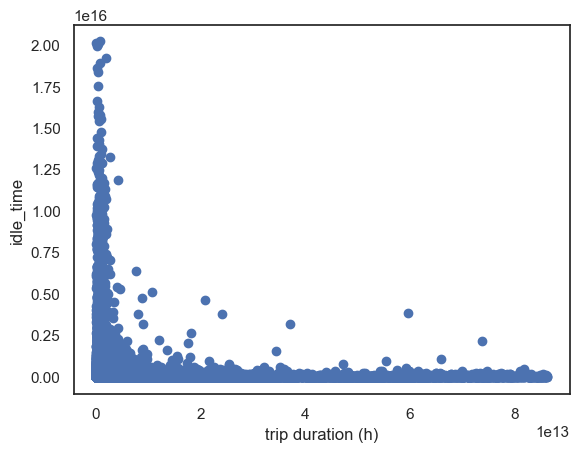

In [26]:
plt.scatter(x, y)
plt.xlabel('trip duration (h)')
plt.ylabel('idle_time')

# start_time

In [27]:
# create month feature
san_fran_df["Month"] = san_fran_df["start_time"].apply(lambda dt: dt.month)
san_fran_df.head()

,start_time,end_time,start_station_id,start_station_lat,start_station_lon,end_station_id,end_station_lat,end_station_lon,bike_id,trip_duration,idle_time,station_idle_time,start_temperature,end_temperature,start_cloud_cover,end_cloud_cover,start_cloud_cover_description,end_cloud_cover_description,start_pressure,end_pressure,start_windspeed,end_windspeed,start_precipitation,end_precipitation,start_felt_temperature,end_felt_temperature,Weekday,Is_Weekend,temperature_dif,temperature_dif_category,rain_start,station_distance,area_label,idle_time_end,start_station_central_station_dist,start_station_ferry_building_dist,end_area_label,start_station_twitter_HQ_dist,Month
0,2018-01-02 09:17:14,2018-01-02 09:23:41,324,37.788300,-122.408531,37,37.785000,-122.395936,17,0 days 00:06:27,0 days 01:32:38,0 days 13:09:25,12.0,12.0,26.0,26.0,Cloudy,Cloudy,1021.31,1021.31,6.0,6.0,0.0,0.0,12.0,12.0,1,0,0.0,3,0,1.168362,2,0 days 19:49:39,1.753276,1.400463,2,1.464568,1
1,2018-01-03 05:13:20,2018-01-03 05:15:55,37,37.785000,-122.395936,21,37.789625,-122.400811,17,0 days 00:02:35,0 days 19:49:39,0 days 00:00:00,14.0,14.0,26.0,26.0,Cloudy,Cloudy,1018.60,1018.60,6.0,6.0,0.0,0.0,14.0,14.0,2,0,0.0,3,0,0.669345,2,0 days 07:33:35,1.075981,1.022033,2,2.034235,1
2,2018-01-03 12:49:30,2018-01-03 13:11:05,53,37.775946,-122.437777,5,37.783899,-122.408445,17,0 days 00:21:35,0 days 07:33:35,0 days 00:00:00,12.0,12.0,27.0,27.0,Mostly Cloudy,Mostly Cloudy,1016.57,1016.57,6.0,6.0,0.0,0.0,12.0,12.0,2,0,0.0,3,0,2.730661,2,0 days 03:10:19,3.581626,4.318992,2,1.872159,1
3,2018-01-03 16:21:24,2018-01-03 16:26:19,5,37.783899,-122.408445,25,37.787522,-122.397405,17,0 days 00:04:55,0 days 03:10:19,0 days 06:49:53,11.0,12.0,28.0,26.0,Mostly Cloudy,Cloudy,1016.23,1016.57,0.0,7.0,0.0,0.0,11.0,12.0,2,0,-1.0,2,0,1.052319,2,0 days 00:12:10,1.376076,1.677306,2,1.068203,1
4,2018-01-03 16:38:29,2018-01-03 16:46:13,25,37.787522,-122.397405,30,37.776598,-122.395282,17,0 days 00:07:44,0 days 00:12:10,0 days 08:01:48,12.0,12.0,26.0,26.0,Cloudy,Cloudy,1016.57,1016.57,7.0,7.0,0.0,0.0,12.0,12.0,2,0,0.0,3,0,1.226794,2,0 days 02:25:33,1.350970,0.778864,0,2.067894,1


In [28]:
#show summer months
summer_months=[6,7,8]
san_fran_df_summer = san_fran_df[san_fran_df['Month'].isin(summer_months)==True]
san_fran_df_summer.head()

,start_time,end_time,start_station_id,start_station_lat,start_station_lon,end_station_id,end_station_lat,end_station_lon,bike_id,trip_duration,idle_time,station_idle_time,start_temperature,end_temperature,start_cloud_cover,end_cloud_cover,start_cloud_cover_description,end_cloud_cover_description,start_pressure,end_pressure,start_windspeed,end_windspeed,start_precipitation,end_precipitation,start_felt_temperature,end_felt_temperature,Weekday,Is_Weekend,temperature_dif,temperature_dif_category,rain_start,station_distance,area_label,idle_time_end,start_station_central_station_dist,start_station_ferry_building_dist,end_area_label,start_station_twitter_HQ_dist,Month
205,2018-06-01 09:10:48,2018-06-01 09:19:59,73,37.771793,-122.433708,108,37.764710,-122.419957,17,0 days 00:09:11,0 days 14:16:41,0 days 12:46:34,12.0,12.0,33.0,33.0,Fair,Fair,1016.91,1016.91,9.0,9.0,0.0,0.0,12.0,12.0,4,0,0.0,3,0,1.444296,2,0 days 00:02:13,3.246696,4.256544,1,1.608271,6
206,2018-06-01 09:22:12,2018-06-01 09:26:30,108,37.764710,-122.419957,124,37.760447,-122.410807,17,0 days 00:04:18,0 days 00:02:13,5 days 18:06:25,12.0,11.0,33.0,33.0,Fair,Fair,1016.91,1016.91,9.0,13.0,0.0,0.0,12.0,11.0,4,0,1.0,4,0,0.934842,2,0 days 07:13:36,2.332390,3.964820,1,1.368694,6
207,2018-06-01 16:40:06,2018-06-01 16:49:48,124,37.760447,-122.410807,116,37.764802,-122.394771,17,0 days 00:09:42,0 days 07:13:36,8 days 04:08:46,16.0,16.0,34.0,34.0,Fair,Fair,1018.60,1018.60,7.0,7.0,0.0,0.0,16.0,16.0,4,0,0.0,3,0,1.493385,2,0 days 00:06:26,2.046714,4.007299,0,1.878022,6
208,2018-06-01 16:56:14,2018-06-01 17:00:20,116,37.764802,-122.394771,114,37.764478,-122.402570,17,0 days 00:04:06,0 days 00:06:26,1 days 07:48:14,16.0,16.0,34.0,34.0,Fair,Fair,1018.60,1018.60,7.0,7.0,0.0,0.0,16.0,16.0,4,0,0.0,3,0,0.688111,2,0 days 01:35:25,1.189243,3.255299,0,2.331959,6
209,2018-06-01 18:35:45,2018-06-01 18:43:31,114,37.764478,-122.402570,67,37.776639,-122.395526,17,0 days 00:07:46,0 days 01:35:25,2 days 08:52:57,19.0,19.0,34.0,34.0,Fair,Fair,1018.60,1018.60,7.0,7.0,0.0,0.0,19.0,19.0,4,0,0.0,3,0,1.485599,2,0 days 04:59:22,1.298588,3.368330,0,1.835700,6


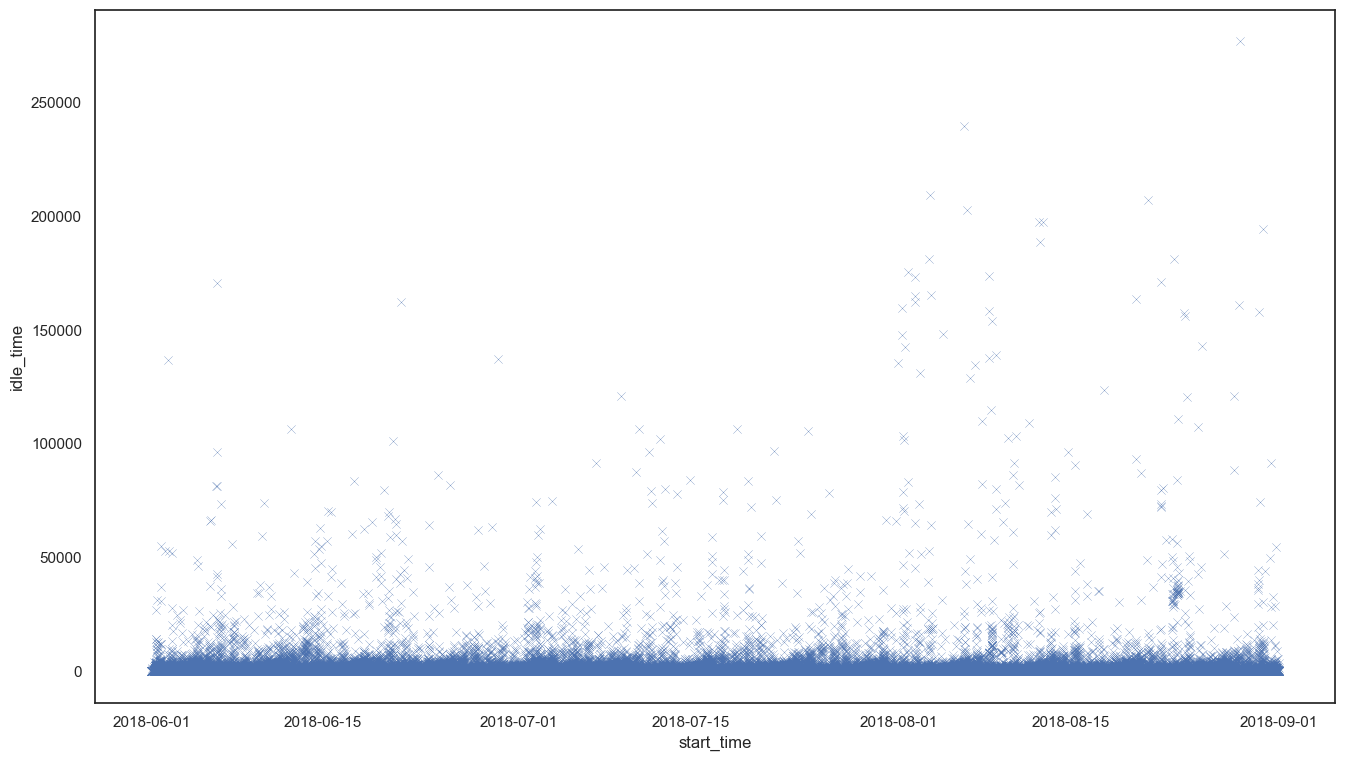

In [29]:
#plot start_time from summer and idle_time
x=san_fran_df_summer['start_time']
y=san_fran_df_summer['idle_time'].dt.total_seconds()/60.0

fig, ax = plt.subplots(figsize = (16,9))

# Plotting the data
ax.scatter(x,y, marker='x', linewidth=0.2)
ax.set_xlabel("start_time")
ax.set_ylabel("idle_time")
plt.show()

# station distance

In [30]:
san_fran_df['station_distance'].describe()

count    1.359874e+06
mean     1.661297e+00
std      1.001147e+00
min      0.000000e+00
25%      9.349605e-01
50%      1.457943e+00
75%      2.168879e+00
max      8.288831e+00
Name: station_distance, dtype: float64

In [31]:
#define a function that will check for outliers in a specified column
def check_outlier(column):
    """
    Takes 'column' as the feature (column) in baywheels_df that will be checked for outliers
    """
    unique_values = san_fran_df[column].unique()
    largest_unique_values = sorted(unique_values, reverse=True)[:10]
    smallest_unique_values = sorted(unique_values)[:10]
    print(f"largest outliers in {column}: {largest_unique_values}")
    print(f"smallest outliers in {column}:{smallest_unique_values}")

In [32]:
check_outlier('station_distance')

largest outliers in station_distance: [8.288831474684486, 7.865899391796463, 7.745730054682276, 7.500420107580924, 7.489437180808874, 7.449095270579806, 7.444763915123908, 7.432497537701852, 7.369841455423831, 7.338955225897247]
smallest outliers in station_distance:[0.0, 0.0133070687183611, 0.0220028336614077, 0.0775642916346313, 0.1218838620614592, 0.123870438265081, 0.1414923513217342, 0.1526957161289509, 0.1596110645456167, 0.1619709513194011]


In [33]:
#cluster the stations in three groups
from sklearn.cluster import KMeans

X = san_fran_df[['end_station_lat','end_station_lon']]

kmeans = KMeans(n_clusters=3, random_state=42)  
kmeans.fit(X)

# Get the cluster labels for each station
san_fran_df['end_area_label'] = kmeans.labels_
san_fran_df.head()

/Users/davidbrablc/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,start_time,end_time,start_station_id,start_station_lat,start_station_lon,end_station_id,end_station_lat,end_station_lon,bike_id,trip_duration,idle_time,station_idle_time,start_temperature,end_temperature,start_cloud_cover,end_cloud_cover,start_cloud_cover_description,end_cloud_cover_description,start_pressure,end_pressure,start_windspeed,end_windspeed,start_precipitation,end_precipitation,start_felt_temperature,end_felt_temperature,Weekday,Is_Weekend,temperature_dif,temperature_dif_category,rain_start,station_distance,area_label,idle_time_end,start_station_central_station_dist,start_station_ferry_building_dist,end_area_label,start_station_twitter_HQ_dist,Month
0,2018-01-02 09:17:14,2018-01-02 09:23:41,324,37.788300,-122.408531,37,37.785000,-122.395936,17,0 days 00:06:27,0 days 01:32:38,0 days 13:09:25,12.0,12.0,26.0,26.0,Cloudy,Cloudy,1021.31,1021.31,6.0,6.0,0.0,0.0,12.0,12.0,1,0,0.0,3,0,1.168362,2,0 days 19:49:39,1.753276,1.400463,0,1.464568,1
1,2018-01-03 05:13:20,2018-01-03 05:15:55,37,37.785000,-122.395936,21,37.789625,-122.400811,17,0 days 00:02:35,0 days 19:49:39,0 days 00:00:00,14.0,14.0,26.0,26.0,Cloudy,Cloudy,1018.60,1018.60,6.0,6.0,0.0,0.0,14.0,14.0,2,0,0.0,3,0,0.669345,2,0 days 07:33:35,1.075981,1.022033,0,2.034235,1
2,2018-01-03 12:49:30,2018-01-03 13:11:05,53,37.775946,-122.437777,5,37.783899,-122.408445,17,0 days 00:21:35,0 days 07:33:35,0 days 00:00:00,12.0,12.0,27.0,27.0,Mostly Cloudy,Mostly Cloudy,1016.57,1016.57,6.0,6.0,0.0,0.0,12.0,12.0,2,0,0.0,3,0,2.730661,2,0 days 03:10:19,3.581626,4.318992,0,1.872159,1
3,2018-01-03 16:21:24,2018-01-03 16:26:19,5,37.783899,-122.408445,25,37.787522,-122.397405,17,0 days 00:04:55,0 days 03:10:19,0 days 06:49:53,11.0,12.0,28.0,26.0,Mostly Cloudy,Cloudy,1016.23,1016.57,0.0,7.0,0.0,0.0,11.0,12.0,2,0,-1.0,2,0,1.052319,2,0 days 00:12:10,1.376076,1.677306,0,1.068203,1
4,2018-01-03 16:38:29,2018-01-03 16:46:13,25,37.787522,-122.397405,30,37.776598,-122.395282,17,0 days 00:07:44,0 days 00:12:10,0 days 08:01:48,12.0,12.0,26.0,26.0,Cloudy,Cloudy,1016.57,1016.57,7.0,7.0,0.0,0.0,12.0,12.0,2,0,0.0,3,0,1.226794,2,0 days 02:25:33,1.350970,0.778864,2,2.067894,1


In [34]:
#make a end_stations_df to use for displaying locations 
columns = ['end_station_id','end_station_lat','end_station_lon']
end_stations_df = san_fran_df[columns]
end_stations_df = end_stations_df.drop_duplicates(subset=['end_station_id'])

end_stations_df.head()


,end_station_id,end_station_lat,end_station_lon
0,37,37.785000,-122.395936
1,21,37.789625,-122.400811
2,5,37.783899,-122.408445
3,25,37.787522,-122.397405
4,30,37.776598,-122.395282


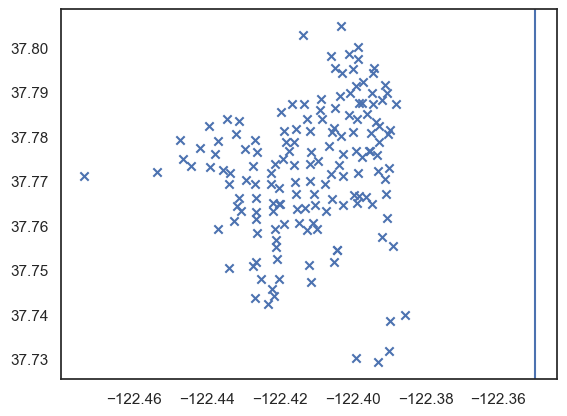

In [35]:
#plot the end_stations locations to see the outliers
x = end_stations_df['end_station_lat']
y = end_stations_df['end_station_lon']
plt.scatter(y,x, marker='x')
plt.axvline(x=-122.35)

We will drop the rows where the bikes have left the San Francisco area, because our model also predicts on the data from San Francisco area

In [36]:
#rows that we will drop from the san_fran_df_geo
rows_to_drop = san_fran_df[san_fran_df['end_station_lon'] > -122.35]
rows_to_drop

,start_time,end_time,start_station_id,start_station_lat,start_station_lon,end_station_id,end_station_lat,end_station_lon,bike_id,trip_duration,idle_time,station_idle_time,start_temperature,end_temperature,start_cloud_cover,end_cloud_cover,start_cloud_cover_description,end_cloud_cover_description,start_pressure,end_pressure,start_windspeed,end_windspeed,start_precipitation,end_precipitation,start_felt_temperature,end_felt_temperature,Weekday,Is_Weekend,temperature_dif,temperature_dif_category,rain_start,station_distance,area_label,idle_time_end,start_station_central_station_dist,start_station_ferry_building_dist,end_area_label,start_station_twitter_HQ_dist,Month


In [37]:
#drop the rows
san_fran_df.drop(rows_to_drop.index, inplace=True)

In [38]:
san_fran_df

,start_time,end_time,start_station_id,start_station_lat,start_station_lon,end_station_id,end_station_lat,end_station_lon,bike_id,trip_duration,idle_time,station_idle_time,start_temperature,end_temperature,start_cloud_cover,end_cloud_cover,start_cloud_cover_description,end_cloud_cover_description,start_pressure,end_pressure,start_windspeed,end_windspeed,start_precipitation,end_precipitation,start_felt_temperature,end_felt_temperature,Weekday,Is_Weekend,temperature_dif,temperature_dif_category,rain_start,station_distance,area_label,idle_time_end,start_station_central_station_dist,start_station_ferry_building_dist,end_area_label,start_station_twitter_HQ_dist,Month
0,2018-01-02 09:17:14,2018-01-02 09:23:41,324,37.788300,-122.408531,37,37.785000,-122.395936,17,0 days 00:06:27,0 days 01:32:38,0 days 13:09:25,12.0,12.0,26.0,26.0,Cloudy,Cloudy,1021.31,1021.31,6.0,6.0,0.0,0.0,12.0,12.0,1,0,0.0,3,0,1.168362,2,0 days 19:49:39,1.753276,1.400463,0,1.464568,1
1,2018-01-03 05:13:20,2018-01-03 05:15:55,37,37.785000,-122.395936,21,37.789625,-122.400811,17,0 days 00:02:35,0 days 19:49:39,0 days 00:00:00,14.0,14.0,26.0,26.0,Cloudy,Cloudy,1018.60,1018.60,6.0,6.0,0.0,0.0,14.0,14.0,2,0,0.0,3,0,0.669345,2,0 days 07:33:35,1.075981,1.022033,0,2.034235,1
2,2018-01-03 12:49:30,2018-01-03 13:11:05,53,37.775946,-122.437777,5,37.783899,-122.408445,17,0 days 00:21:35,0 days 07:33:35,0 days 00:00:00,12.0,12.0,27.0,27.0,Mostly Cloudy,Mostly Cloudy,1016.57,1016.57,6.0,6.0,0.0,0.0,12.0,12.0,2,0,0.0,3,0,2.730661,2,0 days 03:10:19,3.581626,4.318992,0,1.872159,1
3,2018-01-03 16:21:24,2018-01-03 16:26:19,5,37.783899,-122.408445,25,37.787522,-122.397405,17,0 days 00:04:55,0 days 03:10:19,0 days 06:49:53,11.0,12.0,28.0,26.0,Mostly Cloudy,Cloudy,1016.23,1016.57,0.0,7.0,0.0,0.0,11.0,12.0,2,0,-1.0,2,0,1.052319,2,0 days 00:12:10,1.376076,1.677306,0,1.068203,1
4,2018-01-03 16:38:29,2018-01-03 16:46:13,25,37.787522,-122.397405,30,37.776598,-122.395282,17,0 days 00:07:44,0 days 00:12:10,0 days 08:01:48,12.0,12.0,26.0,26.0,Cloudy,Cloudy,1016.57,1016.57,7.0,7.0,0.0,0.0,12.0,12.0,2,0,0.0,3,0,1.226794,2,0 days 02:25:33,1.350970,0.778864,2,2.067894,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1359869,2018-12-31 13:07:21,2018-12-31 13:21:59,364,37.772886,-122.389940,3,37.786375,-122.404904,6234,0 days 00:14:38,0 days 01:16:38,5 days 01:46:03,13.0,13.0,28.0,28.0,Mostly Cloudy / Windy,Mostly Cloudy / Windy,1018.60,1018.60,33.0,33.0,0.0,0.0,13.0,13.0,0,0,0.0,3,0,1.994864,2,0 days 02:15:45,0.690035,2.390883,0,2.383096,12
1359870,2018-12-31 15:37:44,2018-12-31 15:59:07,3,37.786375,-122.404904,24,37.789677,-122.390428,6234,0 days 00:21:23,0 days 02:15:45,19 days 05:43:16,13.0,13.0,28.0,28.0,Mostly Cloudy / Windy,Mostly Cloudy / Windy,1018.60,1018.60,33.0,33.0,0.0,0.0,13.0,13.0,0,0,0.0,3,0,1.326710,2,0 days 01:50:53,1.402139,1.261757,0,1.481856,12
1359871,2018-12-31 17:50:00,2018-12-31 18:00:09,24,37.789677,-122.390428,78,37.773717,-122.411647,6234,0 days 00:10:09,0 days 01:50:53,20 days 01:03:02,13.0,13.0,28.0,28.0,Mostly Cloudy / Windy,Mostly Cloudy / Windy,1018.60,1018.60,33.0,33.0,0.0,0.0,13.0,13.0,0,0,0.0,3,0,2.575179,2,0 days 01:43:51,1.695992,0.607074,1,2.712250,12
1359872,2018-12-31 19:44:00,2018-12-31 19:55:02,78,37.773717,-122.411647,119,37.761047,-122.432642,6234,0 days 00:11:02,0 days 01:43:51,0 days 01:42:45,13.0,13.0,28.0,28.0,Mostly Cloudy / Windy,Mostly Cloudy / Windy,1018.60,1018.60,33.0,33.0,0.0,0.0,13.0,13.0,0,0,0.0,3,0,2.323699,2,0 days 01:19:27,1.291739,2.726417,1,0.547089,12


largest outliers in station_distance: [8.288831474684486, 7.865899391796463, 7.745730054682276, 7.500420107580924, 7.489437180808874, 7.449095270579806, 7.444763915123908, 7.432497537701852, 7.369841455423831, 7.338955225897247]
smallest outliers in station_distance:[0.0, 0.0133070687183611, 0.0220028336614077, 0.0775642916346313, 0.1218838620614592, 0.123870438265081, 0.1414923513217342, 0.1526957161289509, 0.1596110645456167, 0.1619709513194011]


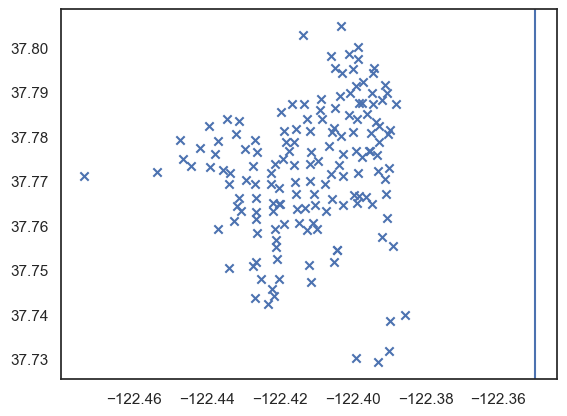

In [39]:
#check if the drop worked by ploting the station locations 
columns = ['end_station_id','end_station_lat','end_station_lon']
end_stations_df = san_fran_df[columns]
end_stations_df = end_stations_df.drop_duplicates(subset=['end_station_id'])
x = end_stations_df['end_station_lat']
y = end_stations_df['end_station_lon']
plt.scatter(y,x, marker='x')
plt.axvline(x=-122.35)
check_outlier('station_distance')

(-0.5, 8.70327304841871)

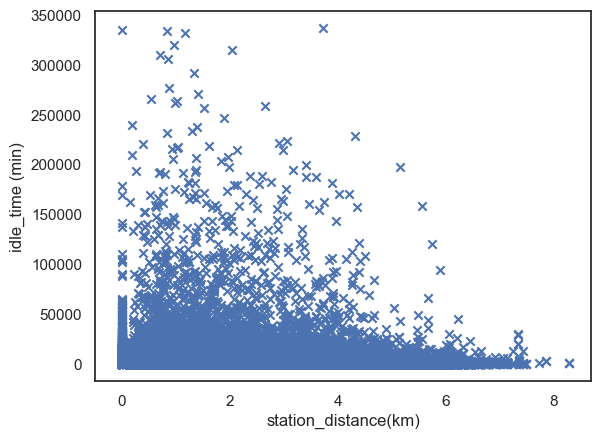

In [40]:
#plot the station_distance and idle_time on scatter plot
x = san_fran_df['station_distance']
y = san_fran_df['idle_time'].dt.total_seconds() / 60.0
plt.scatter(x, y, marker='x')
plt.xlabel('station_distance(km)')
plt.ylabel('idle_time (min)')
plt.xlim(left=-0.5)

Text(0, 0.5, 'number of trips')

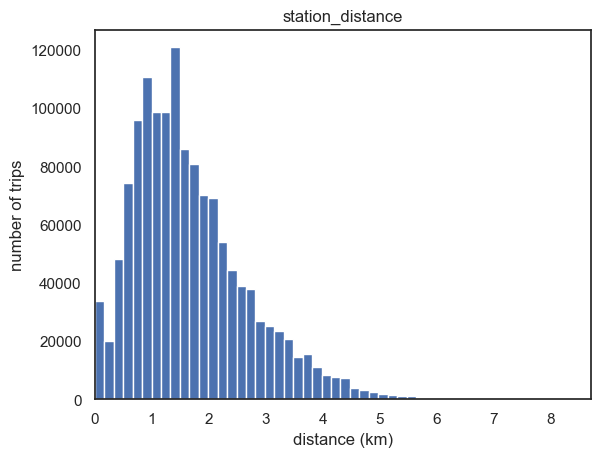

In [41]:
x = san_fran_df['station_distance']
plt.hist(x, bins=50)
plt.xlim(left=0)  # Set the lower and upper limits for the x-axis
plt.title('station_distance')
plt.xlabel('distance (km)')
plt.ylabel('number of trips')

# Feature selection using the Pearson's correlation coefficient via f_regression
The **f_regression** is derived from the **r_regression**, which uses the Pearsons's r or also called the Pearson's correlation coefficient for performing F-test on selected features. **f_regression** is a scoring function used in feature selection procedure. It could also be used in `sklearn's` `SelectKBest` class to select the features all at once. The computed cross_correlation between regressor and target is then converted to an 
*F score* and then to a *p-value*.

The *F score* is computed from the *R^2*. Bigger *R^2* values lead to higher values of *F* -> the higher the *F score* is the better.

In [42]:
from sklearn.feature_selection import f_regression
def feature_selection(f):
    """ 
    Uses Pearson's correlation coefficient via f_regression
    f = feature that is examined
    """
    X = san_fran_df[f].values.reshape(-1,1)
    y = san_fran_df['idle_time'].dt.total_seconds() / 60.0
    # Apply f_regression
    f_scores, p_values = f_regression(X, y)
    # Print results
    print("F-scores:", f_scores)
    print("p-values:", p_values)
    

In [43]:
#drop NaT values from the idle_time column (one for every unique bike ID - the first rental in the year)
san_fran_df.dropna(subset=['idle_time'], inplace=True)

In [44]:
san_fran_df['idle_time']

0         0 days 01:32:38
1         0 days 19:49:39
2         0 days 07:33:35
3         0 days 03:10:19
4         0 days 00:12:10
                ...      
1359869   0 days 01:16:38
1359870   0 days 02:15:45
1359871   0 days 01:50:53
1359872   0 days 01:43:51
1359873   0 days 01:19:27
Name: idle_time, Length: 1359874, dtype: timedelta64[ns]

### start_temperature

In [45]:
feature_selection('start_temperature')

F-scores: [2897.50052353]
p-values: [0.]


### Weekday

In [46]:
feature_selection('Weekday')

F-scores: [143.25605506]
p-values: [5.18689241e-33]


### trip_duration

In [47]:
feature_selection('trip_duration')

F-scores: [58.33182742]
p-values: [2.215759e-14]


### station_distance

In [48]:
feature_selection('station_distance')

F-scores: [776.27636023]
p-values: [8.67605973e-171]


### Is_Weekend

In [49]:
feature_selection('Is_Weekend')

F-scores: [1028.54256952]
p-values: [1.36399226e-225]


### rain_start

In [50]:
feature_selection('rain_start')

F-scores: [18.36857621]
p-values: [1.82047987e-05]


### start_precipitation

In [51]:
feature_selection('start_precipitation')

F-scores: [155.35078657]
p-values: [1.17893037e-35]


### start_station_central_station_dist

In [52]:
feature_selection('start_station_central_station_dist')

F-scores: [5137.28843329]
p-values: [0.]


Text(0, 0.5, 'idle_time_end (minutes)')

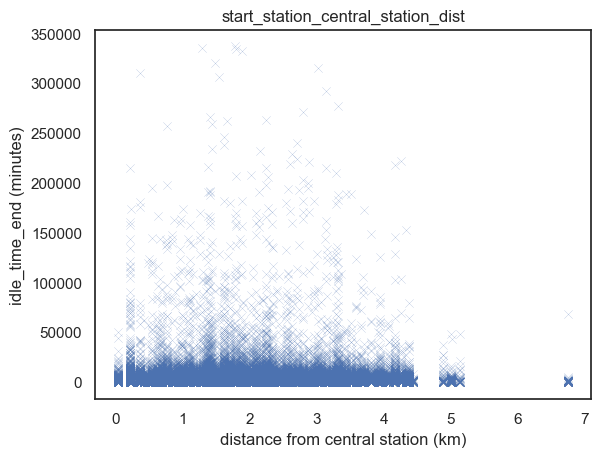

In [53]:
x= san_fran_df['start_station_central_station_dist']
y= san_fran_df['idle_time_end'].dt.total_seconds() / 60.0
plt.scatter(x,y, marker='x', linewidths=0.1)
plt.title('start_station_central_station_dist')
plt.xlabel('distance from central station (km)')
plt.ylabel('idle_time_end (minutes)')

In [54]:
#try to plot it using the distance to mean and median
data = san_fran_df['idle_time']
mean_raw = data.mean()
mean = data.mean().total_seconds() / 60.0
centered_data_mean = data.dt.total_seconds() / 60.0 - mean
median_raw = data.median()
median = data.median().total_seconds()/60.0
centered_data_median = data.dt.total_seconds() / 60.0 - median
print("mean in timedelata dtype:",mean_raw)
print("mean in minutes:",mean)
print("median in timedelata dtype:",median_raw)
print("median in minutes:",median)

print(centered_data_mean)


mean in timedelata dtype: 0 days 09:26:30.171383525
mean in minutes: 566.5028563833333
median in timedelata dtype: 0 days 01:51:13
median in minutes: 111.21666666666667
0         -473.869523
1          623.147144
2         -112.919523
3         -376.186190
4         -554.336190
              ...    
1359869   -489.869523
1359870   -430.752856
1359871   -455.619523
1359872   -462.652856
1359873   -487.052856
Name: idle_time, Length: 1359874, dtype: float64


(-20000.0, 353184.9521436167)

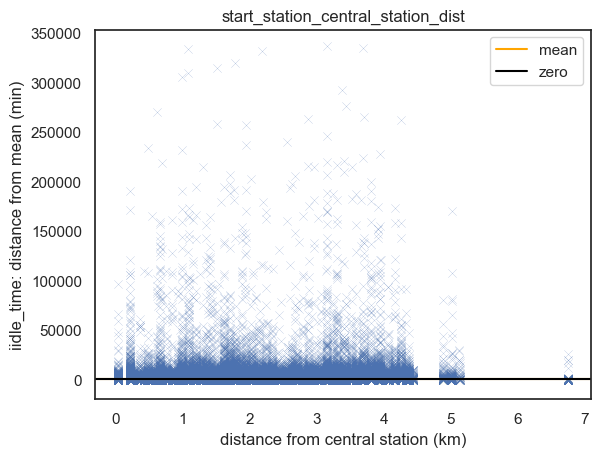

In [55]:
#plot the centered_data_mean distribution
x= san_fran_df['start_station_central_station_dist']
y_centered = centered_data_mean
plt.scatter(x,y_centered, marker='x', linewidths=0.1)
plt.axhline(566.5028563833333, color="orange", label="mean")
plt.axhline(0, color="black", label="zero")
plt.title('start_station_central_station_dist')
plt.xlabel('distance from central station (km)')
plt.ylabel('iidle_time: distance from mean (min)')
plt.legend()
plt.ylim(-20000)

(-1000.0, 40000.0)

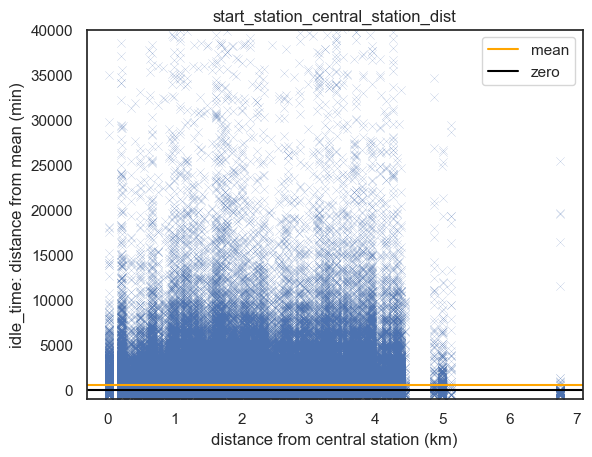

In [56]:
#show idle_time distance from mean < 40000
plt.scatter(x,y_centered, marker='x', linewidths=0.1)
plt.axhline(566.5028563833333, color="orange", label="mean")
plt.axhline(0, color="black", label="zero")
plt.title('start_station_central_station_dist')
plt.xlabel('distance from central station (km)')
plt.ylabel('idle_time: distance from mean (min)')
plt.legend()
plt.ylim(-1000, 40000)

Text(0, 0.5, 'number of trips')

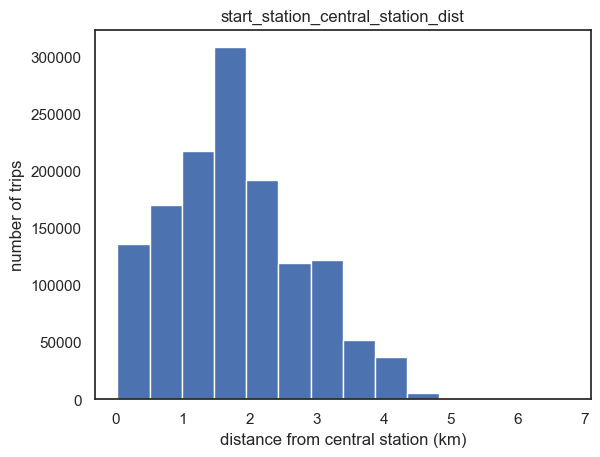

In [57]:
#check the distribution of the start_station_central_station_dist
x= san_fran_df['start_station_central_station_dist']
y= san_fran_df['idle_time'].dt.total_seconds() / 60.0
plt.hist(x, bins=14)
plt.title('start_station_central_station_dist')
plt.xlabel('distance from central station (km)')
plt.ylabel('number of trips')

### start_station_ferry_building_dist

In [58]:
feature_selection('start_station_ferry_building_dist')

F-scores: [8035.85880936]
p-values: [0.]


Text(0, 0.5, 'idle_time (minutes)')

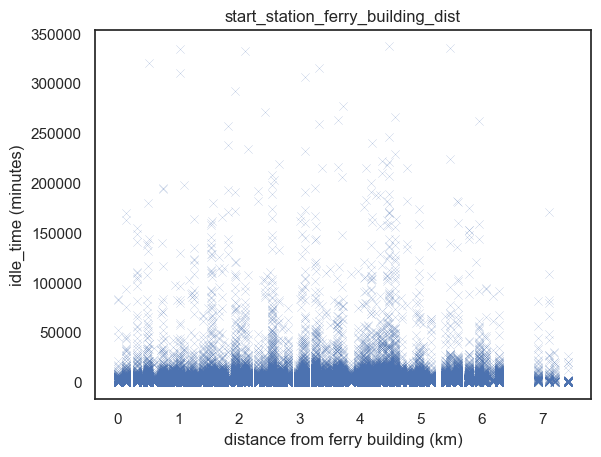

In [59]:
x= san_fran_df['start_station_ferry_building_dist']
y= san_fran_df['idle_time'].dt.total_seconds() / 60.0
plt.scatter(x,y, marker='x', linewidths=0.1)
plt.title('start_station_ferry_building_dist')
plt.xlabel('distance from ferry building (km)')
plt.ylabel('idle_time (minutes)')

Text(0, 0.5, 'number of trips')

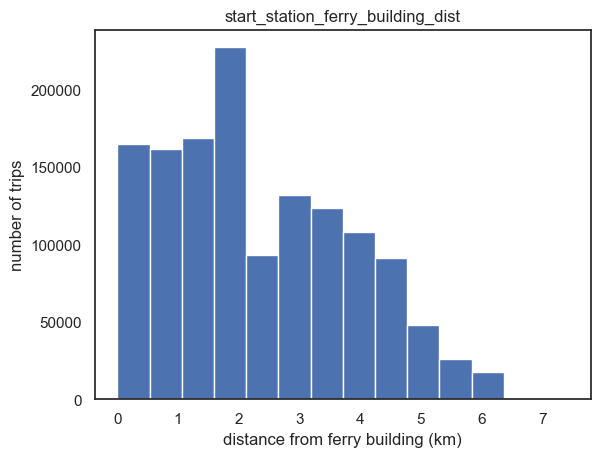

In [60]:
#check the distribution of the start_station_central_station_dist
x= san_fran_df['start_station_ferry_building_dist']
y= san_fran_df['idle_time'].dt.total_seconds() / 60.0
plt.hist(x, bins=14)
plt.title('start_station_ferry_building_dist')
plt.xlabel('distance from ferry building (km)')
plt.ylabel('number of trips')

(-20000.0, 353184.9521436167)

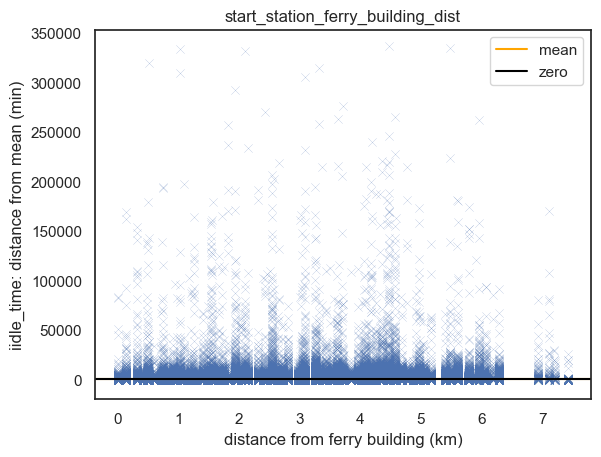

In [62]:
#plot the centered_data distribution
x= san_fran_df['start_station_ferry_building_dist']
y_centered = centered_data_mean
plt.scatter(x,y_centered, marker='x', linewidths=0.1)
plt.axhline(566.5028563833333, color="orange", label="mean")
plt.axhline(0, color="black", label="zero")
plt.title('start_station_ferry_building_dist')
plt.xlabel('distance from ferry building (km)')
plt.ylabel('iidle_time: distance from mean (min)')
plt.legend()
plt.ylim(-20000)

(-1000.0, 40000.0)

/Users/davidbrablc/anaconda3/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/Users/davidbrablc/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


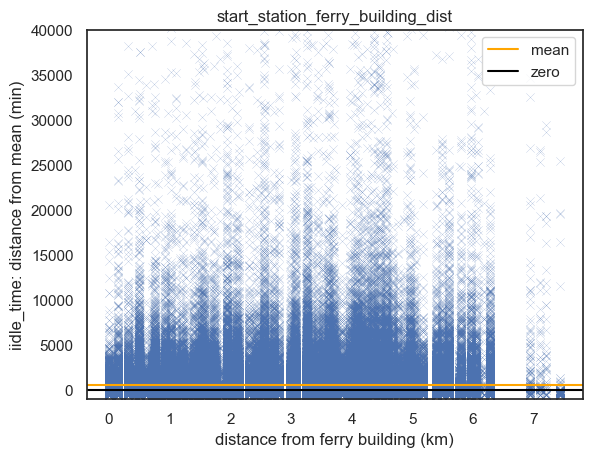

In [63]:
plt.scatter(x,y_centered, marker='x', linewidths=0.1)
plt.axhline(566.5028563833333, color="orange", label="mean")
plt.axhline(0, color="black", label="zero")
plt.title('start_station_ferry_building_dist')
plt.xlabel('distance from ferry building (km)')
plt.ylabel('iidle_time: distance from mean (min)')
plt.legend()
plt.ylim(-1000, 40000)

### start_station_twitter_HQ_dist

In [64]:
feature_selection('start_station_twitter_HQ_dist')

F-scores: [37.7325832]
p-values: [8.11602693e-10]


This shows that there is no big correlation between **idle_time** and the **start_station_twitter_HQ_dist**

(-20000.0, 353184.9521436167)

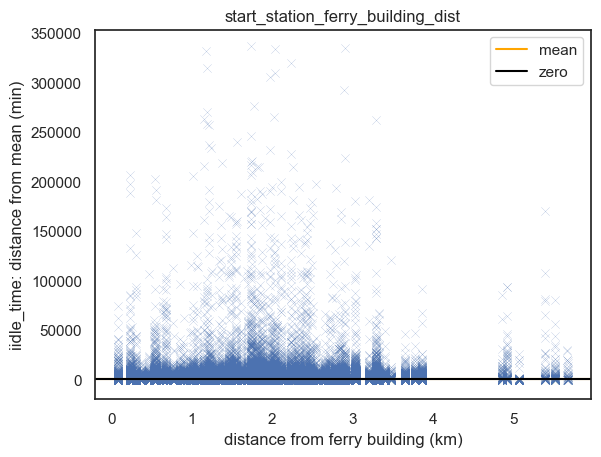

In [66]:
x= san_fran_df['start_station_twitter_HQ_dist']
y_centered = centered_data_mean
plt.scatter(x,y_centered, marker='x', linewidths=0.1)
plt.axhline(566.5028563833333, color="orange", label="mean")
plt.axhline(0, color="black", label="zero")
plt.title('start_station_ferry_building_dist')
plt.xlabel('distance from ferry building (km)')
plt.ylabel('iidle_time: distance from mean (min)')
plt.legend()
plt.ylim(-20000)

### start_felt_temperature

In [67]:
feature_selection('start_felt_temperature')

F-scores: [3009.82581533]
p-values: [0.]


Text(0, 0.5, 'idle_time /minutes')

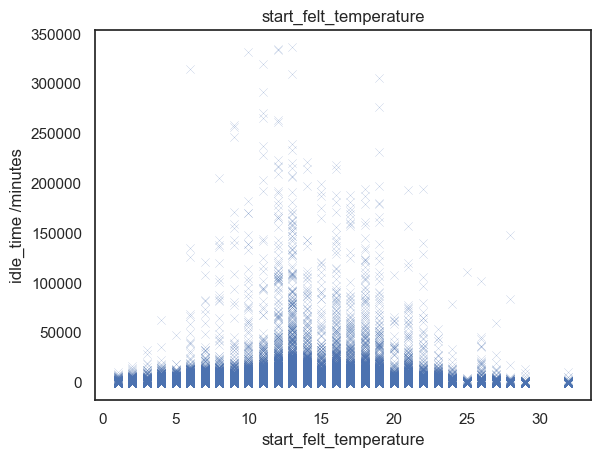

In [68]:
#plotting the start_felt_temperature and idle_time to examine the values
x= san_fran_df['start_felt_temperature']
y_1= san_fran_df['idle_time'].dt.total_seconds() / 60.0
fig,ax = plt.subplots()
ax.scatter(x,y_1, marker='x', linewidths=0.1)
ax.set_title('start_felt_temperature')
ax.set_xlabel('start_felt_temperature')
ax.set_ylabel('idle_time /minutes')


This shows that there apears to be longer idle times when the temperatures are between 10 and 20 degrees Celsius. Let's investigate what may be the reason.

We check the distribution of the start_felt_temperature.

Text(0, 0.5, 'number of trips')

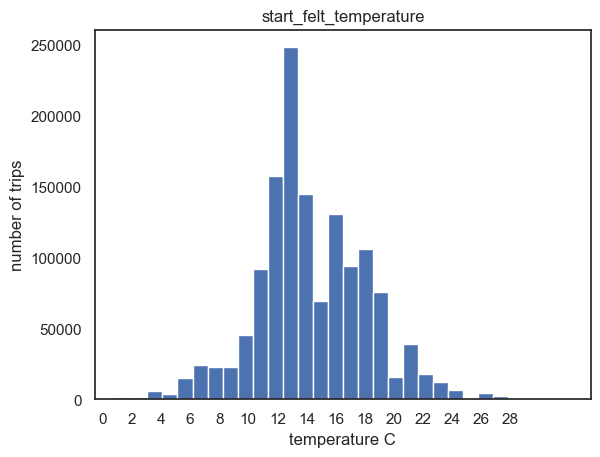

In [79]:
#check the distribution of the start_felt_temperature
x= san_fran_df['start_felt_temperature']
plt.hist(x, bins=30)
plt.xticks(np.arange(0,30,2))
plt.title('start_felt_temperature')
plt.xlabel('temperature C')
plt.ylabel('number of trips')

This shows that in the same temperature window 10-20 Celsius the number of trips are also the largest.

We now look at the trip duration to confirm the assumption that in the temperature window 10-20 Celsius people make more trips that take more time because they are enjoying the mild weather.

### trip_duration

Text(0, 0.5, 'trip_duration (min)')

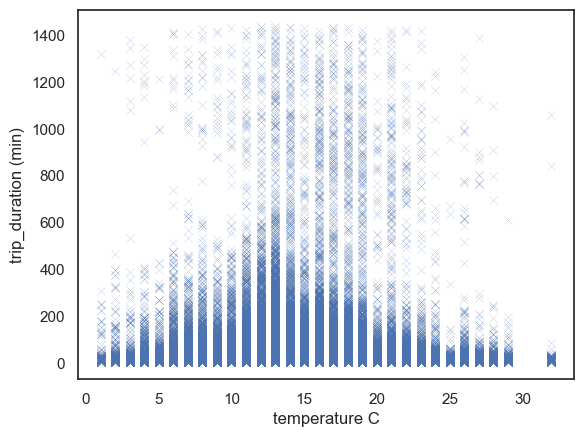

In [71]:
y = san_fran_df['trip_duration'].dt.total_seconds()/60.0
x = san_fran_df['start_felt_temperature']

plt.scatter(x,y, marker='x', linewidths=0.1)
plt.xlabel('temperature C')
plt.ylabel('trip_duration (min)')

The above graph confirms our hypothesis that people indeed make longer trips in the 10-20 Celsius temperature window.

To understand why the idle time of bikes, the trip duration and number of trips are larger when the temperature is between 10 and 20 degrees Celsius, we can look at a specific station and the usage of this station.

(-3000.0, 60000.0)

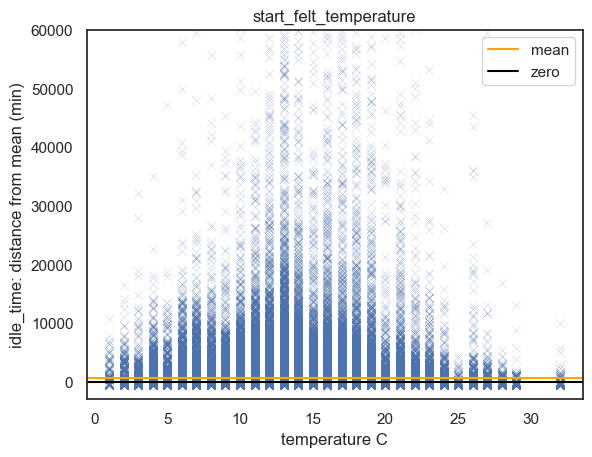

In [70]:
x=san_fran_df['start_felt_temperature']
plt.scatter(x,y_centered, marker='x', linewidths=0.1)
plt.axhline(566.5028563833333, color="orange", label="mean")
plt.axhline(0, color="black", label="zero")
plt.title('start_felt_temperature')
plt.xlabel('temperature C')
plt.ylabel('idle_time: distance from mean (min)')
plt.legend()
plt.ylim(-3000, 60000)

### end_felt_temperature

In [72]:
feature_selection('end_felt_temperature')

F-scores: [3115.83887915]
p-values: [0.]


end_felt_temperature is a better predictor for idle_time, it makes sense due to the nature of the idle time, where it naturally depends more on the temperature at the end of the ride, rather than at the beginning

Text(0, 0.5, 'idle_time /minutes')

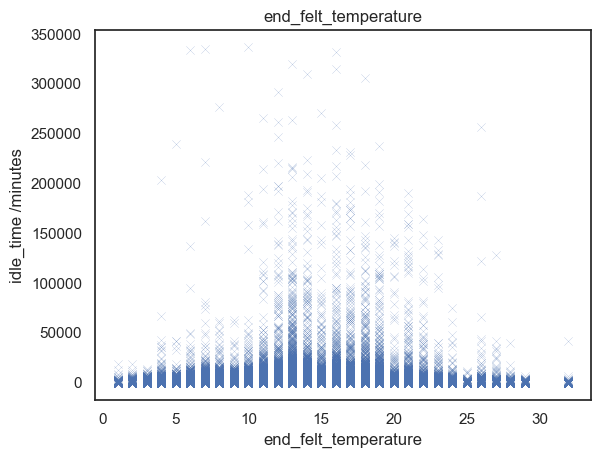

In [76]:
x= san_fran_df['end_felt_temperature']
y= san_fran_df['idle_time_end'].dt.total_seconds() / 60.0
plt.scatter(x,y, marker='x', linewidths=0.1)
plt.title('end_felt_temperature')
plt.xlabel('end_felt_temperature')
plt.ylabel('idle_time /minutes')

Text(0, 0.5, 'number of trips')

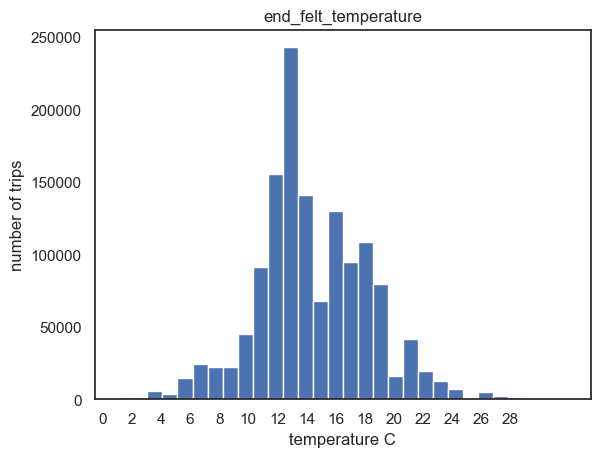

In [74]:
#check the distribution of the start_felt_temperature
x= san_fran_df['end_felt_temperature']
y= san_fran_df['idle_time'].dt.total_seconds() / 60.0
plt.hist(x, bins=30)
plt.xticks(np.arange(0,30,2))
plt.title('end_felt_temperature')
plt.xlabel('temperature C')
plt.ylabel('number of trips')

### start_cloud_cover

In [75]:
feature_selection('start_cloud_cover')

F-scores: [420.00843049]
p-values: [2.51049799e-93]


### Is_Weekend

Text(0.5, 1.0, 'Weekend')

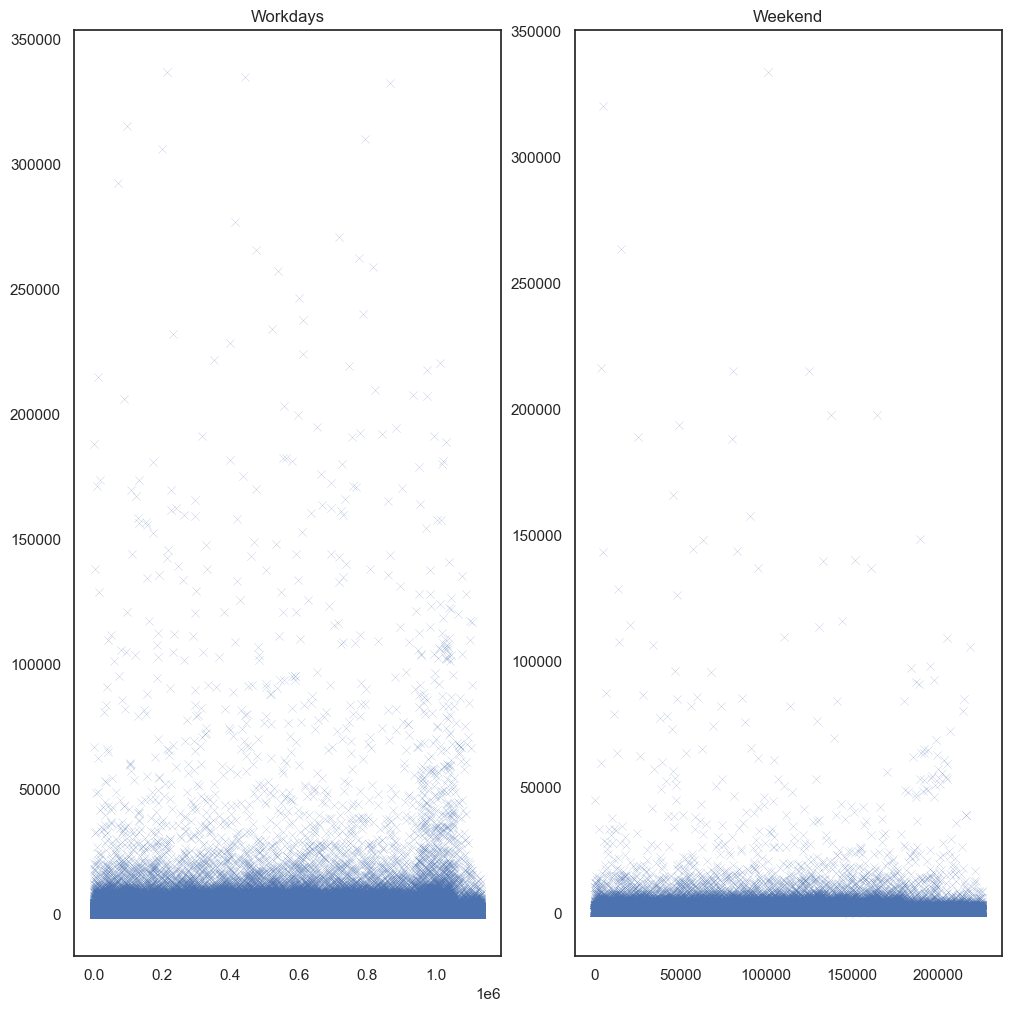

In [78]:
#plot the differences between idle_time and idle_time_end and workday x weekend
y_1 = san_fran_df[san_fran_df['Is_Weekend'] == 0]['idle_time'].dt.total_seconds()/60
x_1 = np.arange(len(y_1))
y_2 = san_fran_df[san_fran_df['Is_Weekend'] == 1]['idle_time'].dt.total_seconds() /60
x_2 = np.arange(len(y_2))

fig, axs = plt.subplots(1,2, figsize=(10,10),constrained_layout=True)
axs[0].scatter(x_1,y_1, marker='x', linewidths=0.1)
axs[0].set_title('Workdays')
axs[1].scatter(x_2,y_2, marker='x', linewidths=0.1)
axs[1].set_title('Weekend')


In [ ]:
fig, axs = plt.subplots(2,1)
axs[0].hist(y_1)
axs[1].scatter(x_2,y_2, marker='x')

In [ ]:
y = san_fran_df[san_fran_df['Is_Weekend'] == 0]['idle_time'].dt.total_seconds() / 60.0

# Create histogram with logarithmic scale on y-axis
plt.hist(y, bins=100,log=True)
plt.xlabel('idle_time (minutes)')
plt.ylabel('Frequency (log scale)')
plt.title('Histogram of idle_time (Is_Weekend = 0) with Log Scale')
plt.show()


In [ ]:
y = san_fran_df[san_fran_df['Is_Weekend'] == 1]['idle_time'].dt.total_seconds() / 60.0

# Create histogram with logarithmic scale on y-axis
plt.hist(y, bins=100, log=True)
plt.xlabel('idle_time (minutes)')
plt.ylabel('Frequency (log scale)')
plt.title('Histogram of idle_time (Is_Weekend = 1) with Log Scale')
plt.show()

In [ ]:
san_fran_df.columns

## Using the SelectKBest class from sklearn

In [ ]:
#try to choose the best feature for predicting of idle_time by using the selectKBest class from sklearn
from sklearn.feature_selection import SelectKBest
x = san_fran_df[['start_temperature', 'end_temperature',
                 'start_cloud_cover', 'end_cloud_cover',
                 'start_pressure', 'end_pressure', 'start_windspeed', 'end_windspeed', 'start_precipitation', 
                 'end_precipitation', 'start_felt_temperature', 'end_felt_temperature', 'Weekday', 'Is_Weekend',
                 'temperature_dif','rain_start', 'station_distance', 'start_station_central_station_dist',
                 'start_station_ferry_building_dist', 'start_station_twitter_HQ_dist']]
y = san_fran_df['idle_time'].dt.total_seconds() / 60.0
print("Feature data dimension:", x.shape)
select = SelectKBest(score_func=f_regression, k=5)
x_selected = select.fit_transform(x,y)
print("After selecting best 5 features:", x_selected.shape) 

In [ ]:
selected_indices = select.get_support(indices=True)

# Get the names of the selected features
selected_features = [x.columns[idx] for idx in selected_indices]
selected_values = pd.DataFrame(x_selected, columns=selected_features)
selected_feature_scores = pd.DataFrame({"Feature": selected_features, "Score": selected_scores})
selected_scores = select.scores_[selected_indices]
print("Selected features with scores:")
print(selected_feature_scores)


The SelectKBest class form sklearn show us that the features with the biggest correlation with idle_time are the distance to the points of interest that we have chosen using the visual map exploration of the stations and their respective numbers of interactions. For the prediction model we will use the two distance features: **start_station_central_station_dist,start_station_ferry_building_dist** and the **end_felt_temperature feature**.

## Building the prediction models:

# 1) Linear regression